## Importing Libraries

In [1]:
!pip install apyori

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
dataset = pd.read_csv('../data/Market_Basket_Optimisation.csv',  header = None)

## Data Preprocessing

In [4]:
transactions = []

for i in range(0, 7501):
    transactions.append([str(dataset.values[i, j])for j in range(0, 20)])

## Training Apriori model on dataset

In [5]:
from apyori import apriori

rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualizing results

In [6]:
results = list(rules)

In [7]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Result in dataframe

In [8]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [9]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Sorted on descending Lifts

In [10]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


### Plot for Rules vs Lift

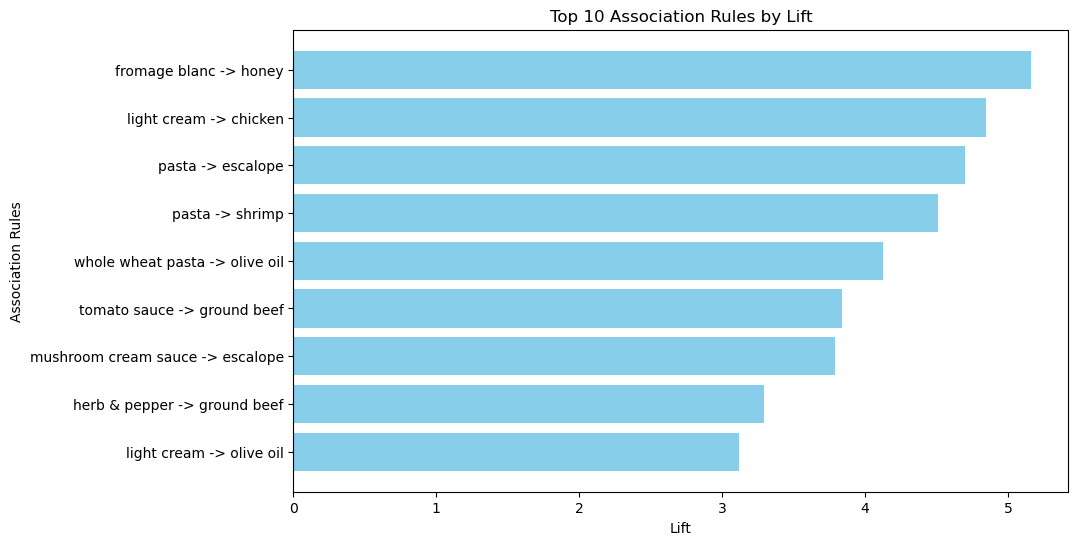

In [11]:
top_10_rules = resultsinDataFrame.nlargest(n=10, columns='Lift')

plt.figure(figsize=(10, 6))
plt.barh(top_10_rules['Left Hand Side'] + ' -> ' + top_10_rules['Right Hand Side'], top_10_rules['Lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()


### Plot for Support vs Confidence

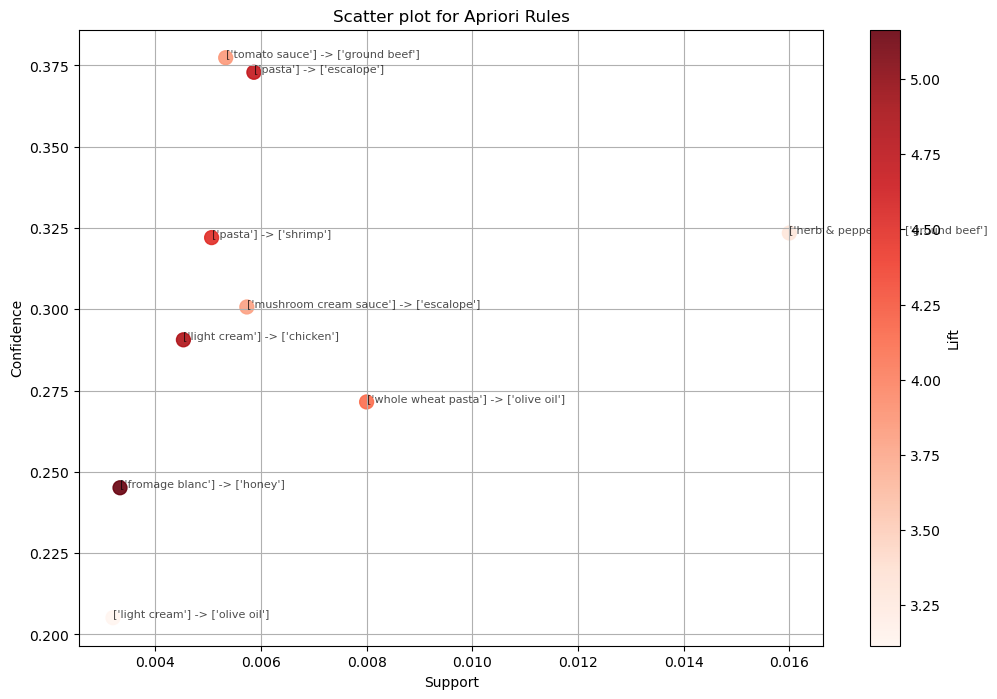

In [100]:
rules_list = list(results)

rules_metrics = []
rules_text = []

for rule in rules_list:
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift
    antecedents = list(rule.ordered_statistics[0].items_base)
    consequents = list(rule.ordered_statistics[0].items_add)
    
    rule_text = f"{antecedents} -> {consequents}"
    rules_metrics.append([support, confidence, lift])
    rules_text.append(rule_text)

rules_df = pd.DataFrame(rules_metrics, columns=['support', 'confidence', 'lift'])
rules_df['rule'] = rules_text

plt.figure(figsize=(12, 8))
scatter = plt.scatter(rules_df['support'], rules_df['confidence'], c=rules_df['lift'], s = 100, cmap='Reds', alpha=0.9)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter plot for Apriori Rules')

for i in range(len(rules_df)):
    plt.annotate(rules_df['rule'][i], 
                 (rules_df['support'][i], rules_df['confidence'][i]),
                 fontsize=8, alpha=0.7, rotation=0)

plt.grid(True)
plt.show()
